# 1D Fourier Transform - introduction

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import my_functions as mfun

## Sine and cosine functions

We known from trogonometry that [sine](http://mathworld.wolfram.com/Sine.html) and [cosine](http://mathworld.wolfram.com/Cosine.html) are periodic functions (with period $\lambda = 2  \pi$) that are bounded between $-1$ and $1$.

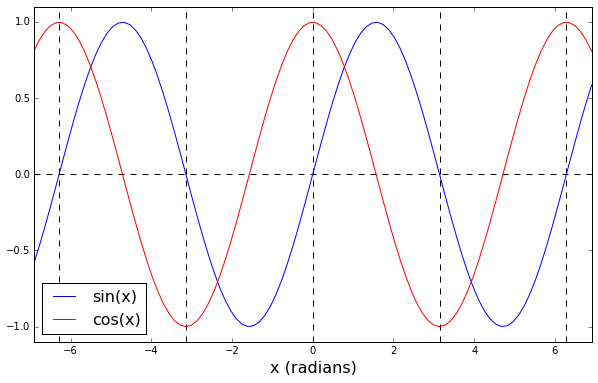

In [2]:
mfun.sine_cosine(-2.2*np.pi, 2.2*np.pi)

<a id='fig1'>**Figure 1**</a>: Sine and cosine functions. The vertical dashed lines are located at multiples of $\pi$.

According to the [Figure 1](#fig1), we can see that $\sin \left( x \right)$ is an odd function and $\cos \left( x \right)$ is an even function, e.g.,

<a id='eq1'></a>

$$
\sin \left( -x \right) = -\sin \left( x \right) \tag{1}
$$

and

<a id='eq2'></a>

$$
\cos \left( -x \right) = \cos \left( x \right) \: . \tag{2}
$$

Besides, we know that

<a id='eq3a'></a>

$$
\int \limits_{k \pi}^{\left( k + 2\right) \pi} \sin \left( x \right) \; dx = 0 \tag{3a}
$$

and

<a id='eq3b'></a>

$$
\int \limits_{k \pi}^{\left( k + 2\right) \pi}  \cos \left( x \right) \; dx = 0 \: , \tag{3b}
$$

for any integer $k$.

## Wavelenght

Consider the following sine and cosine functions:

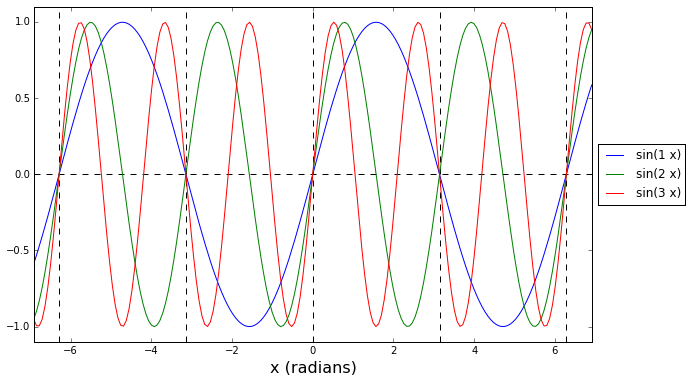

In [3]:
mfun.sine(-2.2*np.pi, 2.2*np.pi, [i for i in range(1,4)], npoints=200)

<a id='fig2'>**Figure 2**</a>: Sine functions with different periods. The vertical dashed lines are located at multiples of $\pi$.

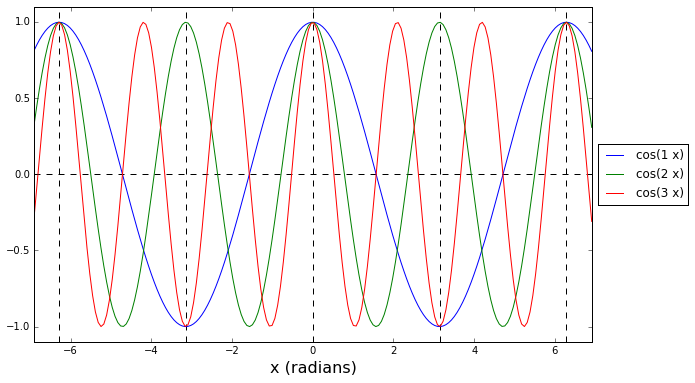

In [5]:
mfun.cosine(-2.2*np.pi, 2.2*np.pi, [i for i in range(1,4)], npoints=200)

<a id='fig3'>**Figure 3**</a>: Cosine functions with different periods. The vertical dashed lines are located at multiples of $\pi$.

Figures [2](#fig2) and [3](#fig3) show the functions $\sin (n \, x)$ and $\cos (n \, x)$ for $n = 1$, $2$, and $3$. Notice that the integer $k$ determines the number of times that the sine and cosine functions complete a cycle on the interval $\left[ \, 0 \, , \, 2 \pi \, \right]$. In this case, the period $\lambda$ of these functions can be defined as follows:

<a id='eq4'></a>

$$
\lambda = \frac{2 \, \pi}{n} \: . \tag{4}
$$

Notice that all functions $\sin (n \, x)$ and $\cos (n \, x)$, $n = 1, 2, 3, \dots$, are periodic over the interval $\left[ \, 0 \, , \, 2 \pi \, \right]$. Consequently,

<a id='eq5a'></a>

$$
\int \limits_{k \pi}^{\left( k + 2\right) \pi} \sin \left( n \, x \right) \; dx = 0 \tag{5a}
$$

and

<a id='eq5b'></a>

$$
\int \limits_{k \pi}^{\left( k + 2\right) \pi} \cos \left( n \, x \right) \; dx = 0 \: . \tag{5b}
$$

## Fourier series

### Calculating the coefficients of the series

#### Orthogonality relations